# **AI TECH INSTITUTE** · *Matplotlib from Zero to Hero*
### Understanding Figures, Axes, and Subplots
**Instructor:** Amir Charkhi  |  **Goal:** Demystify matplotlib completely

> "Most students struggle with matplotlib because they copy-paste without understanding. Today we fix that!"


## 🎯 The Big Picture

Think of matplotlib like building a house:
- **Figure** = The land/canvas
- **Axes** = The rooms where you put things
- **Plot** = The furniture in each room

You can have one big room or multiple small rooms on your land!

In [ ]:
# !pip install matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# We'll use our housing data from the previous notebook
np.random.seed(42)
print("Ready to visualize! 📊")

Ready to visualize! 📊


## Part 1: The Simplest Plot Possible

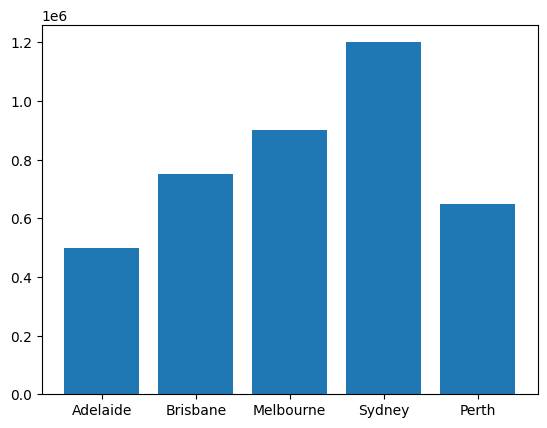

✅ It works! But we have no control...


In [17]:
# METHOD 1: The "Quick and Dirty" Way
# This is what most tutorials show you

prices = [500000, 750000, 900000, 1200000, 650000]
cities = ['Adelaide', 'Brisbane', 'Melbourne', 'Sydney', 'Perth']

plt.bar(cities, prices)
plt.show()

print("✅ It works! But we have no control...")

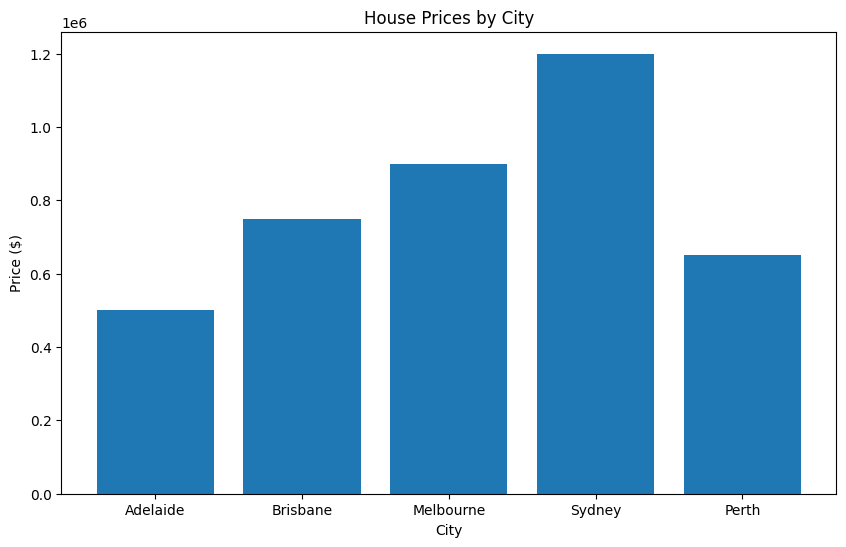

✅ Now we have FULL control!


In [27]:
# METHOD 2: The "Professional" Way - Understanding What's Happening

# Step 1: Create the canvas (figure)
fig = plt.figure(figsize=(10, 6))  # Width=10 inches, Height=6 inches

# Step 2: Add a room (axes) to the canvas
ax = fig.add_subplot(111)  # 1 row, 1 column, plot #1

# Step 3: Put furniture (plot) in the room
ax.bar(cities, prices)

# Step 4: Decorate the room
ax.set_title('House Prices by City')
ax.set_xlabel('City')
ax.set_ylabel('Price ($)')

plt.show()

print("✅ Now we have FULL control!")

## Part 2: Understanding Subplots - Multiple Rooms!
This is where students get confused. Let's make it crystal clear.

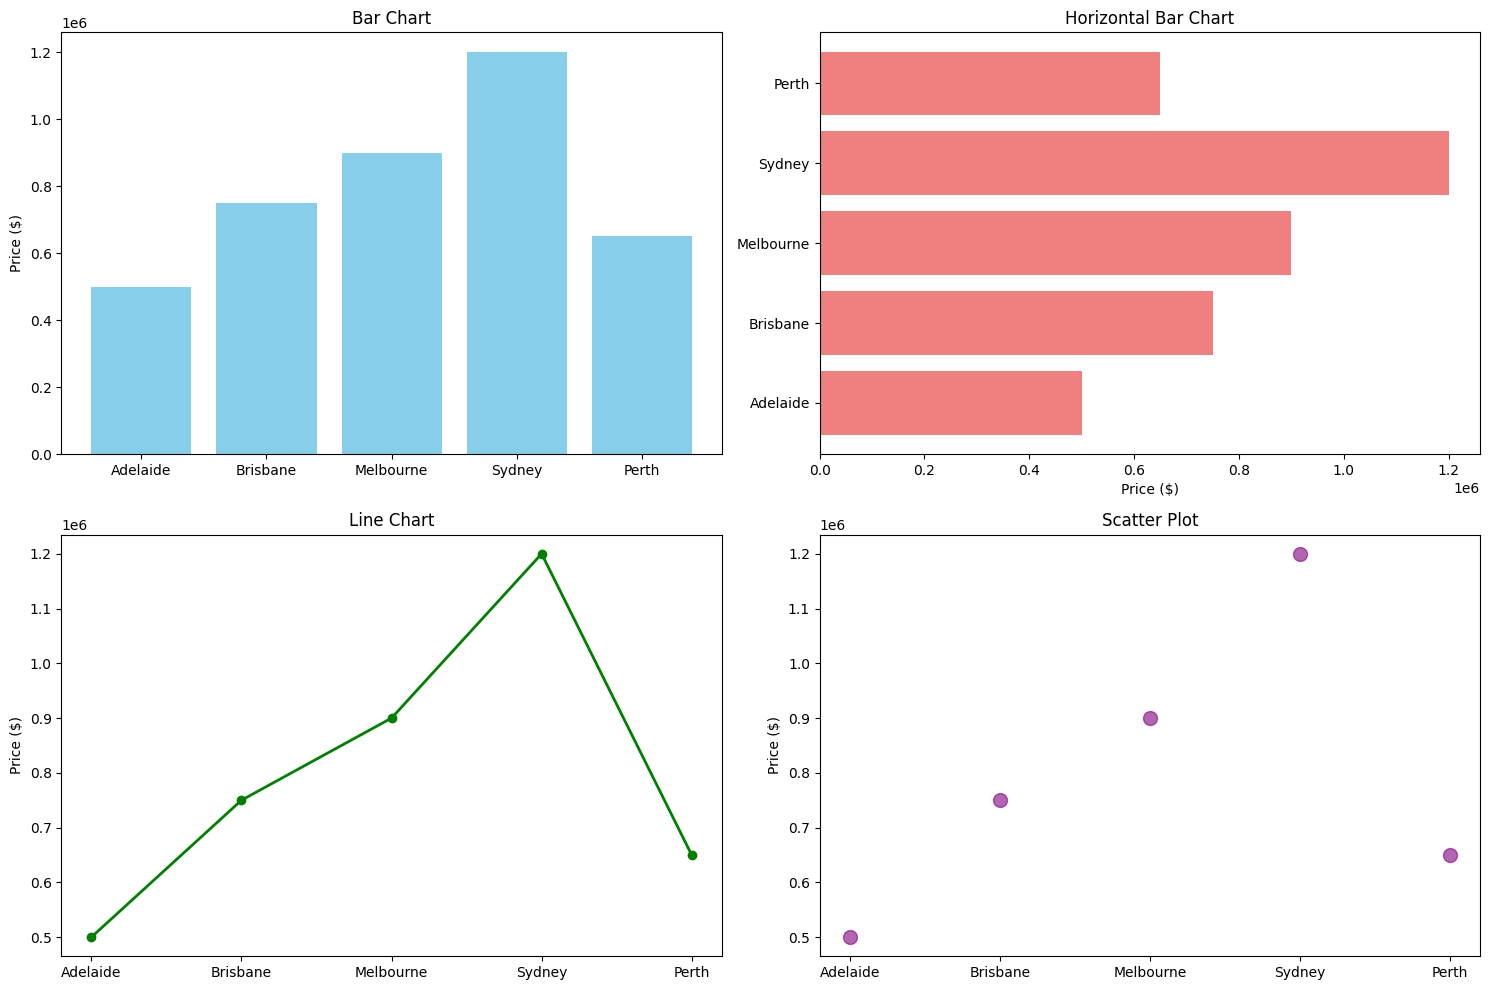

✅ Four different visualizations of the same data!


In [32]:
# Create 4 different views of the same data
# Think of it as 4 rooms in a 2x2 house layout

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns

# Now 'axes' is a 2x2 array of rooms!
# Access them like: axes[row, column]

# Room 1 (top-left): Bar chart
axes[0, 0].bar(cities, prices, color='skyblue')
axes[0, 0].set_title('Bar Chart')
axes[0, 0].set_ylabel('Price ($)')

# Room 2 (top-right): Horizontal bar
axes[0, 1].barh(cities, prices, color='lightcoral')
axes[0, 1].set_title('Horizontal Bar Chart')
axes[0, 1].set_xlabel('Price ($)')

# Room 3 (bottom-left): Line plot
axes[1, 0].plot(cities, prices, marker='o', color='green', linewidth=2)
axes[1, 0].set_title('Line Chart')
axes[1, 0].set_ylabel('Price ($)')

# Room 4 (bottom-right): Scatter plot
axes[1, 1].scatter(cities, prices, s=100, color='purple', alpha=0.6)
axes[1, 1].set_title('Scatter Plot')
axes[1, 1].set_ylabel('Price ($)')

# Adjust spacing between rooms
plt.tight_layout()
plt.show()

print("✅ Four different visualizations of the same data!")

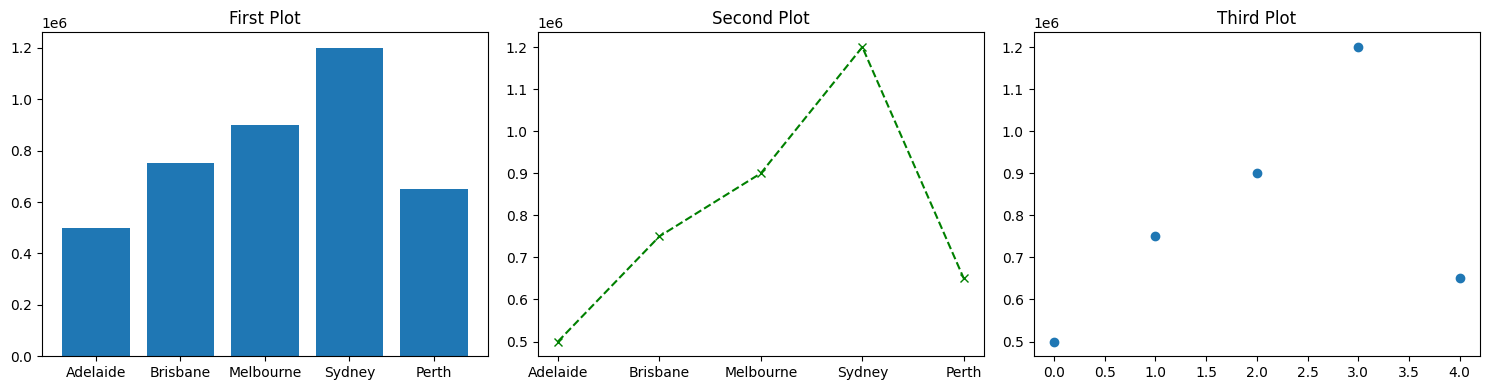

In [34]:
# PRO TIP: When you have just one row or column, axes is 1D!

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

# Now axes is just a 1D array: axes[0], axes[1], axes[2]
axes[0].bar(cities, prices)
axes[0].set_title('First Plot')

#axes[1].plot(cities, prices, 'ro-')
axes[1].plot(cities, prices, 'gx--')
axes[1].set_title('Second Plot')

axes[2].scatter(range(len(cities)), prices)
axes[2].set_title('Third Plot')

plt.tight_layout()
plt.show()

## Part 3: Using Our Housing Dataset

In [35]:
# Let's create a smaller version of our housing dataset for visualization
np.random.seed(42)
n_properties = 1000

cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Hobart', 'Darwin', 'Canberra']
city_weights = [0.25, 0.22, 0.15, 0.12, 0.10, 0.06, 0.04, 0.06]

housing_data = pd.DataFrame({
    'city': np.random.choice(cities, n_properties, p=city_weights),
    'property_type': np.random.choice(['House', 'Apartment', 'Townhouse', 'Villa'], 
                                     n_properties, p=[0.45, 0.35, 0.15, 0.05]),
    'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_properties, p=[0.1, 0.25, 0.35, 0.25, 0.05]),
    'distance_cbd': np.random.exponential(15, n_properties),
})

# Add realistic prices
base_price = {
    'Sydney': 1200000, 'Melbourne': 950000, 'Brisbane': 750000, 'Perth': 650000,
    'Adelaide': 600000, 'Hobart': 550000, 'Darwin': 600000, 'Canberra': 850000
}

housing_data['price'] = housing_data.apply(lambda row: 
    base_price[row['city']] * 
    (1 + 0.15 * row['bedrooms']) * 
    (1 - 0.01 * row['distance_cbd']) *
    (1 + np.random.normal(0, 0.15)), axis=1
)

print("Dataset created!")
print(housing_data.head())

Dataset created!
        city property_type  bedrooms  distance_cbd         price
0  Melbourne         House         2     16.753309  1.232992e+06
1   Canberra     Apartment         2     23.894716  8.804699e+05
2      Perth     Townhouse         4      4.324592  9.045014e+05
3   Brisbane     Apartment         2     14.707404  8.884725e+05
4     Sydney     Townhouse         2     12.720581  1.267797e+06


## Part 4: Pre-attentive Attributes Demonstration
Now let's recreate the visualization from your example, but explained!

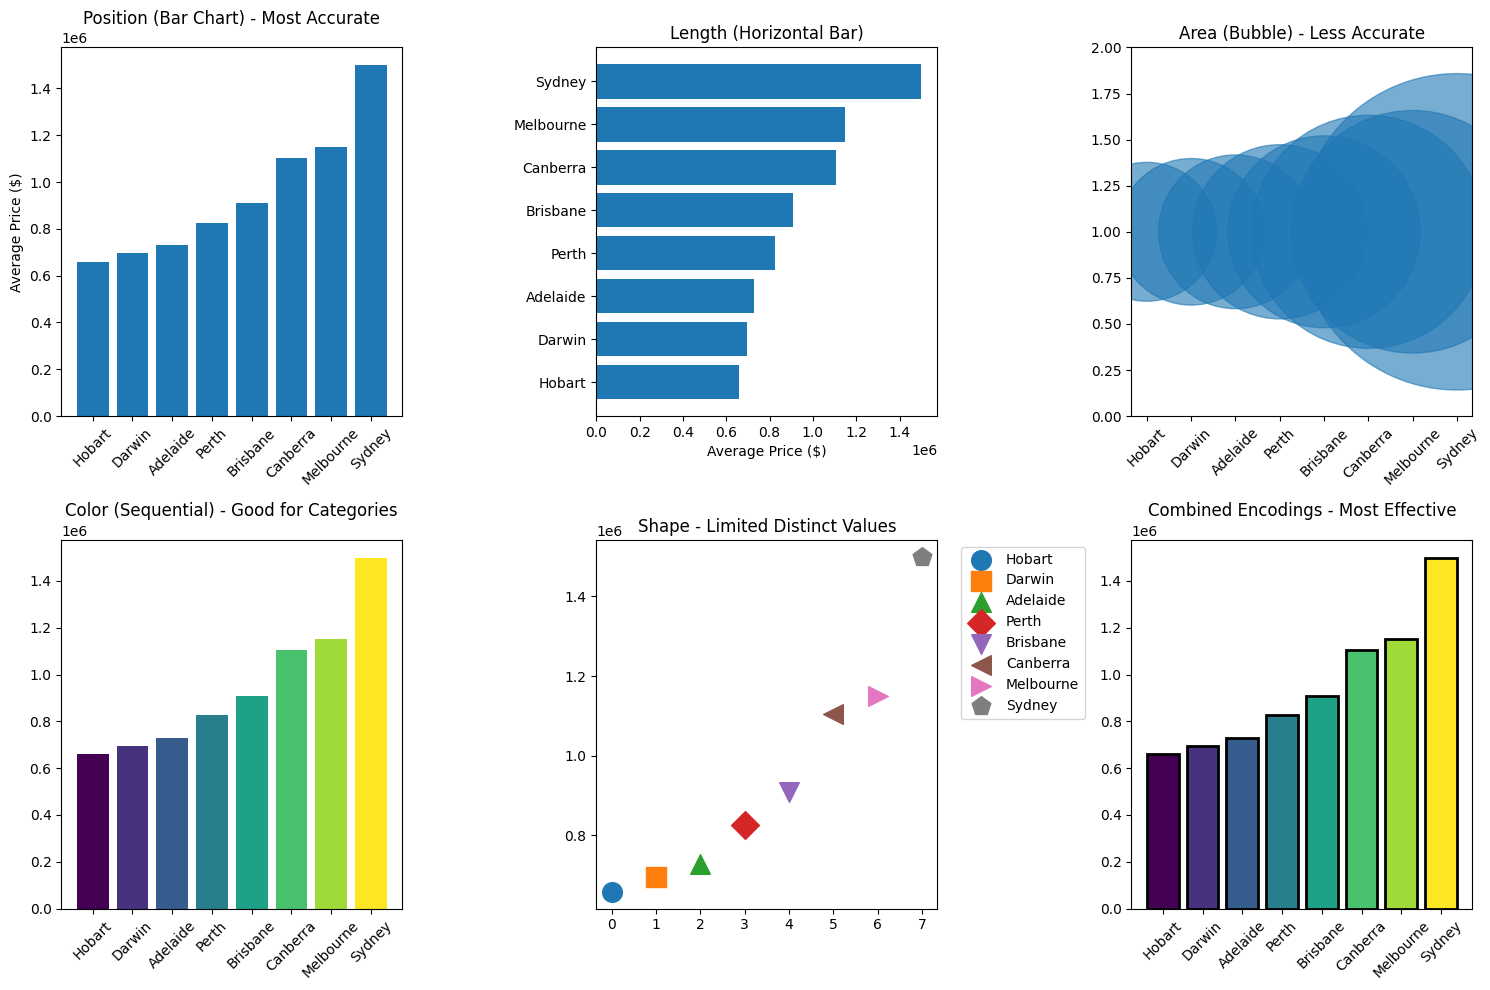

Key Insight: Position and length are most accurate for quantitative comparisons.
Color works well for categories, area/volume can be misleading.


In [20]:
# Prepare data: Average price by city
city_avg_prices = housing_data.groupby('city')['price'].mean().sort_values()

# Create our 2x3 grid of visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. POSITION (Bar Chart) - Most Accurate
axes[0, 0].bar(range(len(city_avg_prices)), city_avg_prices.values)
axes[0, 0].set_xticks(range(len(city_avg_prices)))
axes[0, 0].set_xticklabels(city_avg_prices.index, rotation=45)
axes[0, 0].set_title('Position (Bar Chart) - Most Accurate')
axes[0, 0].set_ylabel('Average Price ($)')

# 2. LENGTH (Horizontal Bar)
axes[0, 1].barh(range(len(city_avg_prices)), city_avg_prices.values)
axes[0, 1].set_yticks(range(len(city_avg_prices)))
axes[0, 1].set_yticklabels(city_avg_prices.index)
axes[0, 1].set_title('Length (Horizontal Bar)')
axes[0, 1].set_xlabel('Average Price ($)')

# 3. AREA (Bubble) - Less Accurate
# Make bubble sizes proportional to price
sizes = (city_avg_prices.values / city_avg_prices.values.min() * 100) ** 2
axes[0, 2].scatter(range(len(city_avg_prices)), [1]*len(city_avg_prices), 
                   s=sizes, alpha=0.6)
axes[0, 2].set_xticks(range(len(city_avg_prices)))
axes[0, 2].set_xticklabels(city_avg_prices.index, rotation=45)
axes[0, 2].set_title('Area (Bubble) - Less Accurate')
axes[0, 2].set_ylim(0, 2)

# 4. COLOR (Sequential) - Good for Categories
colors = plt.cm.viridis(np.linspace(0, 1, len(city_avg_prices)))
axes[1, 0].bar(range(len(city_avg_prices)), city_avg_prices.values, color=colors)
axes[1, 0].set_xticks(range(len(city_avg_prices)))
axes[1, 0].set_xticklabels(city_avg_prices.index, rotation=45)
axes[1, 0].set_title('Color (Sequential) - Good for Categories')

# 5. SHAPE - Limited Distinct Values
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
for i, (city, value) in enumerate(city_avg_prices.items()):
    axes[1, 1].scatter(i, value, s=200, marker=markers[i], label=city)
axes[1, 1].set_title('Shape - Limited Distinct Values')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. COMBINATION - Most Effective
axes[1, 2].bar(range(len(city_avg_prices)), city_avg_prices.values, 
               color=colors, edgecolor='black', linewidth=2)
axes[1, 2].set_xticks(range(len(city_avg_prices)))
axes[1, 2].set_xticklabels(city_avg_prices.index, rotation=45)
axes[1, 2].set_title('Combined Encodings - Most Effective')

plt.tight_layout()
plt.show()

print("Key Insight: Position and length are most accurate for quantitative comparisons.")
print("Color works well for categories, area/volume can be misleading.")

## Part 5: Common Customizations You'll Actually Use

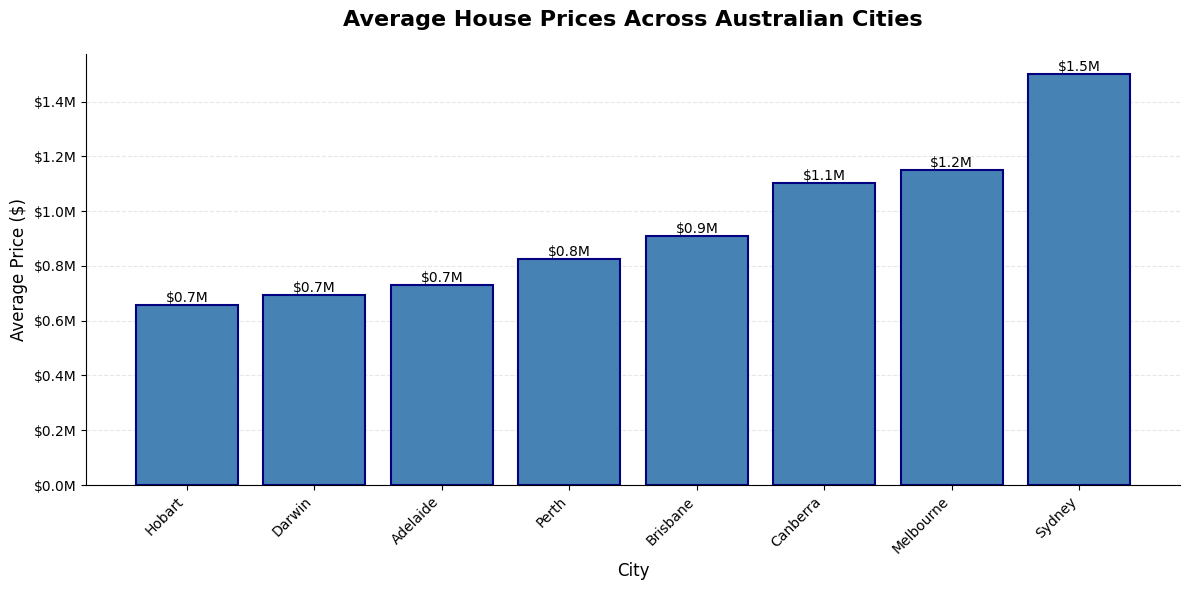

✅ This is publication-ready!


In [23]:
# A professional-looking plot with all the customizations

fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
bars = ax.bar(city_avg_prices.index, city_avg_prices.values, 
               color='steelblue', edgecolor='navy', linewidth=1.5)

# Customize the plot
ax.set_title('Average House Prices Across Australian Cities', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Average Price ($)', fontsize=12)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height/1e6:.1f}M',
            ha='center', va='bottom', fontsize=10)

# Add a grid for easier reading
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)  # Grid behind bars

# Rotate x-labels if needed
plt.xticks(rotation=45, ha='right')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print("✅ This is publication-ready!")

## Part 6: Interactive Practice - Fix Common Mistakes

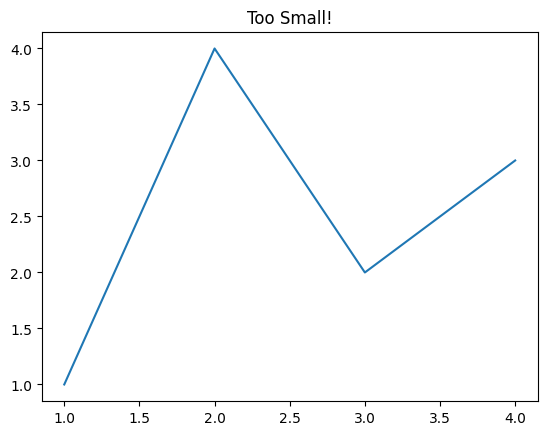

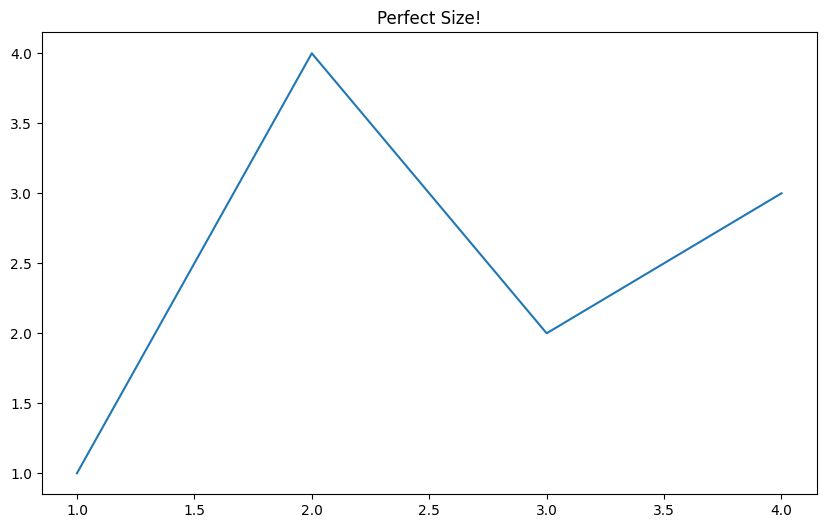

In [36]:
# COMMON MISTAKE 1: Forgetting to set figure size
# This creates a tiny, unreadable plot

# Bad:
plt.figure()  # No size specified!
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title('Too Small!')
plt.show()

# Good:
plt.figure(figsize=(10, 6))  # Always specify size!
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])
plt.title('Perfect Size!')
plt.show()

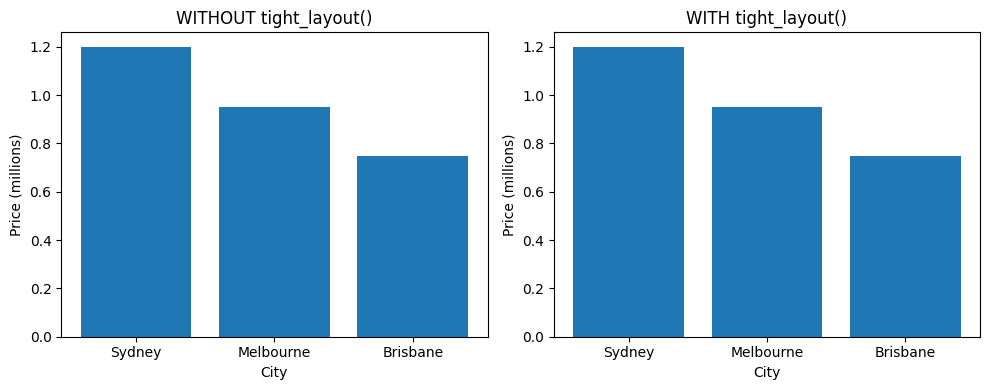

In [43]:
# COMMON MISTAKE 2: Not using tight_layout() with subplots

# Create comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Without tight_layout - labels overlap!
ax1.bar(['Sydney', 'Melbourne', 'Brisbane'], [1.2, 0.95, 0.75])
ax1.set_title('WITHOUT tight_layout()')
ax1.set_ylabel('Price (millions)')
ax1.set_xlabel('City')

ax2.bar(['Sydney', 'Melbourne', 'Brisbane'], [1.2, 0.95, 0.75])
ax2.set_title('WITH tight_layout()')
ax2.set_ylabel('Price (millions)')
ax2.set_xlabel('City')

# This fixes overlapping!
plt.tight_layout()
plt.show()

## 🎯 Exercise: Create Your Own Dashboard
Create a 2x2 dashboard showing:
1. Average price by property type (bar chart)
2. Price distribution (histogram)
3. Price vs Distance from CBD (scatter)
4. Number of properties by bedroom count (pie chart)

In [44]:
housing_data.head()

,city,property_type,bedrooms,distance_cbd,price
0,Melbourne,House,2,16.753309,1.232992e+06
1,Canberra,Apartment,2,23.894716,8.804699e+05
2,Perth,Townhouse,4,4.324592,9.045014e+05
3,Brisbane,Apartment,2,14.707404,8.884725e+05
4,Sydney,Townhouse,2,12.720581,1.267797e+06


In [49]:
# average price by property type
average_price_by_property = housing_data.groupby('property_type')['price'].mean().sort_values()
average_price_by_property

property_type
Apartment    1.066181e+06
House        1.083165e+06
Townhouse    1.091557e+06
Villa        1.108900e+06
Name: price, dtype: float64

In [57]:
# number of properties by bedroom counts
property_by_bedroom = housing_data.groupby('bedrooms')['property_type'].count()
property_by_bedroom

bedrooms
1    104
2    243
3    342
4    251
5     60
Name: property_type, dtype: int64

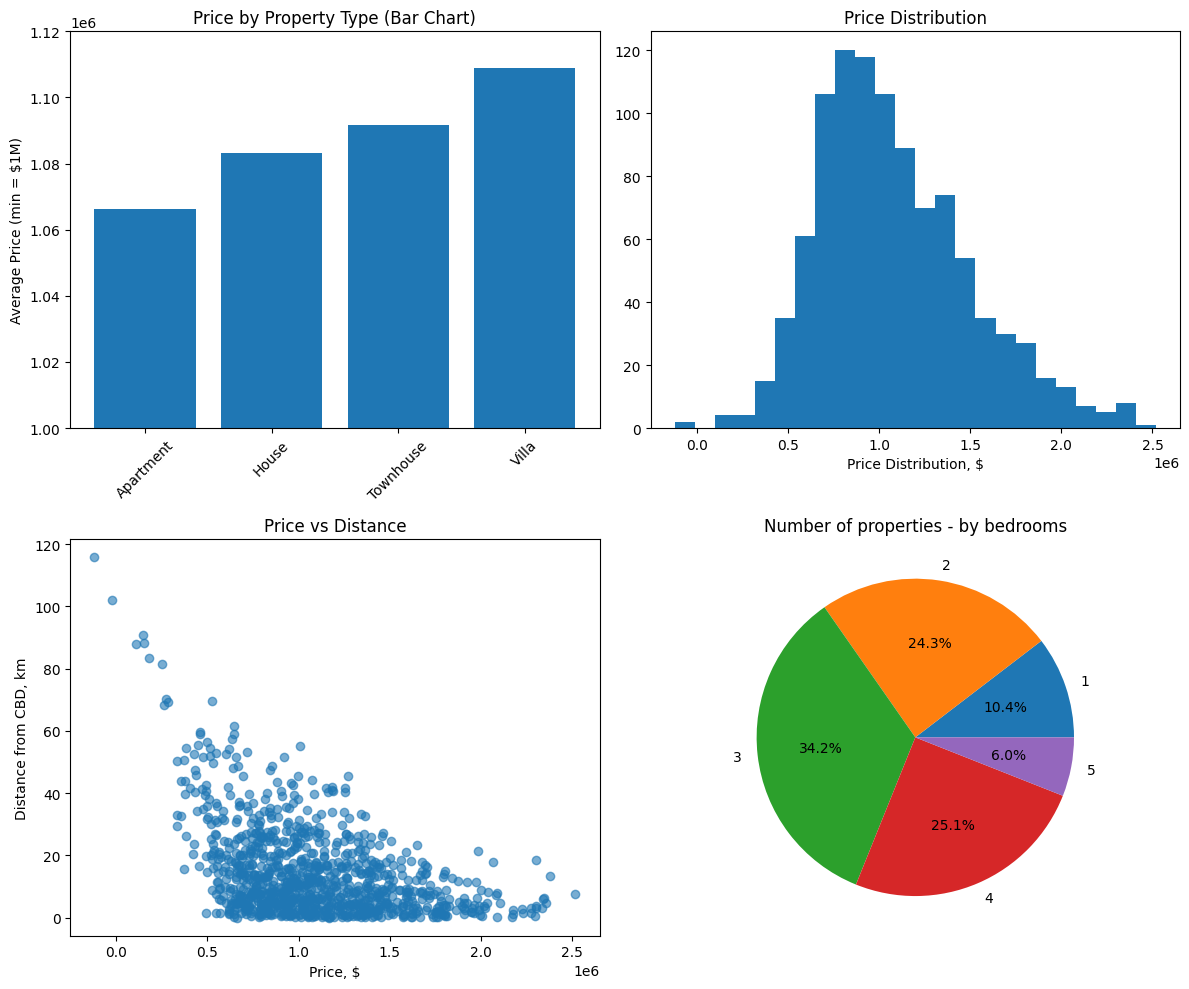

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# axes[0, 0] - property type bar chart
axes[0, 0].bar(range(len(average_price_by_property)), average_price_by_property.values)
axes[0, 0].set_xticks(range(len(average_price_by_property)))
axes[0, 0].set_xticklabels(average_price_by_property.index, rotation=45)
axes[0, 0].set_ylim(1E6, 1.12E6)
axes[0, 0].set_title('Price by Property Type (Bar Chart)')
axes[0, 0].set_ylabel('Average Price (min = $1M)')

# axes[0, 1] - price histogram
axes[0,1].hist(housing_data['price'], bins = 'auto')
axes[0,1].set_xlabel('Price Distribution, $')
axes[0,1].set_title('Price Distribution')

# axes[1, 0] - scatter plot
axes[1,0].scatter(housing_data['price'], housing_data['distance_cbd'], alpha = 0.6)
axes[1,0].set_xlabel('Price, $')
axes[1,0].set_ylabel('Distance from CBD, km')
axes[1,0].set_title('Price vs Distance')

# axes[1, 1] - pie chart
axes[1,1].pie(property_by_bedroom.values, labels = property_by_bedroom.index, autopct = "%1.1f%%")
axes[1,1].set_title('Number of properties - by bedrooms')

plt.tight_layout()
plt.show()
               

## 📝 Key Takeaways

### The Hierarchy:
1. **Figure** = The whole canvas/window
2. **Axes** = Individual plot areas (the "rooms")
3. **Artist** = Everything you see (lines, text, patches)

### Remember:
- Always use `figsize` for readable plots
- Use `tight_layout()` to prevent overlapping
- `axes[row, col]` for 2D grid, `axes[index]` for 1D
- Position and length are most accurate for comparisons
- Label everything (title, axes, legend)

### Common Patterns:
```python
# Single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Multiple plots
fig, axes = plt.subplots(nrows, ncols, figsize=(width, height))

# Always end with
plt.tight_layout()
plt.show()
```

### Next: Advanced visualizations and Seaborn!